In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.model_selection import train_test_split # module to split our data into train and test sets

import statsmodels.api as sm
import statsmodels.tools 
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler,StandardScaler

%matplotlib inline

Import Data

In [2]:
cars = pd.read_csv('data/cars_cleaned.csv')
cars.drop(columns=['brand'],inplace=True)
cars.head()

,price,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,model,trim_level,age
0,995.0,85405.0,103.0,Manual,Petrol,4.0,Hatchback,1,1.6,ASTRA,base,2.890372
1,1350.0,84000.0,103.0,Manual,Petrol,3.0,Hatchback,1,1.6,ASTRA,base,2.890372
2,1100.0,105000.0,79.0,Manual,Diesel,0.0,Estate,0,1.7,ASTRA,base,2.890372
3,1695.0,64000.0,123.0,Automatic,Petrol,5.0,Estate,1,1.8,ASTRA,base,2.890372
4,1649.0,96793.0,123.0,Automatic,Petrol,5.0,Estate,1,1.8,ASTRA,base,2.890372


In [3]:
# Select only the continuous features from the dataset
cont_features = cars.select_dtypes(include=['float', 'int']).columns.to_list()
cat_features = cars.select_dtypes(include=['object']).columns.to_list()


Percentage of null values in each column 

In [4]:
cars.isnull().mean().round(4) * 100

price           0.0
mileage         0.0
BHP             0.0
transmission    0.0
fuel            0.0
owners          0.0
body            0.0
ULEZ            0.0
engine          0.0
model           0.0
trim_level      0.0
age             0.0
dtype: float64

Find unique values of categorical columns 

In [5]:
cols = cars.select_dtypes(include=['object']).columns.tolist()
for col in cols:
    print(col,':',cars[col].unique())

transmission : ['Manual' 'Automatic']
fuel : ['Petrol' 'Diesel' 'Petrol Plug-in Hybrid']
body : ['Hatchback' 'Estate' 'Convertible' 'Coupe' 'SUV' 'MPV']
model : ['ASTRA' 'NON-FRANCHISE' 'MOKKA' 'GTC' 'CORSA' 'GRANDLAND' 'MERIVA'
 'ZAFIRA']
trim_level : ['base' 'HATCHBACK' 'SPORTS' 'C' 'DIESEL' 'X' 'GTC' 'DOOR' 'EXCITE' 'SE'
 'SRI' 'MPV' 'PLATE' 'TOURER']


## Feature Engineering



In [6]:
def feature_eng(df):
    """
    function to perform second level feature engineering by performing scaling
    on selected columns and one-hot encoding categorical features
    i/p : df
    o/p: df 
    """

    # Define continuous and categorical features
    cont_features = ['BHP','owners','engine','mileage','age']
    cat_features = ['model', 'trim_level', 'fuel', 'transmission', 'body']

    # One-hot encode categorical features using get_dummies
    df_ohe = pd.get_dummies(df, columns=cat_features, drop_first=True, prefix=cat_features)

    # Scale continuous features using StandardScaler
    scaler = StandardScaler()

    cont_transform = scaler.fit_transform(df[cont_features])
    df_ohe[cont_features] = cont_transform

    df_ohe = sm.add_constant(df_ohe)

    return df_ohe


Basic feature engineering

## Split train and test data

split into features and dependent variable

In [7]:
feature_cols = list(cars.columns)
feature_cols.remove('price')
cont_features.remove('price')

# split into features and dependent variable
X = cars[feature_cols]
y = cars['price']

X.head()

,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,model,trim_level,age
0,85405.0,103.0,Manual,Petrol,4.0,Hatchback,1,1.6,ASTRA,base,2.890372
1,84000.0,103.0,Manual,Petrol,3.0,Hatchback,1,1.6,ASTRA,base,2.890372
2,105000.0,79.0,Manual,Diesel,0.0,Estate,0,1.7,ASTRA,base,2.890372
3,64000.0,123.0,Automatic,Petrol,5.0,Estate,1,1.8,ASTRA,base,2.890372
4,96793.0,123.0,Automatic,Petrol,5.0,Estate,1,1.8,ASTRA,base,2.890372


Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)


X_train shape: (15870, 11)
y_train shape: (15870,)
X_test shape: (3968, 11)
y_test shape: (3968,)


In [9]:
X_train.head()

,mileage,BHP,transmission,fuel,owners,body,ULEZ,engine,model,trim_level,age
1835,42000.0,113.731258,Automatic,Petrol,5.0,Hatchback,1,1.6,ASTRA,base,2.197225
11647,15985.0,113.731258,Manual,Petrol,0.0,Hatchback,1,1.4,CORSA,base,1.386294
14241,6168.0,113.731258,Manual,Petrol,3.0,SUV,1,1.2,GRANDLAND,X,0.693147
18926,14200.0,113.000000,Manual,Petrol,0.0,MPV,1,1.6,ZAFIRA,base,2.397895
8409,16299.0,113.731258,Manual,Petrol,0.0,Hatchback,1,1.0,CORSA,base,2.079442


### Feature Engineer Train Data 



In [10]:
X_train.dtypes

mileage         float64
BHP             float64
transmission     object
fuel             object
owners          float64
body             object
ULEZ              int64
engine          float64
model            object
trim_level       object
age             float64
dtype: object

In [11]:
X_train = feature_eng(X_train)
X_test = feature_eng(X_test)
print('X_train shape:',X_train.shape)
print('y_train shape:',y_train.shape)
print('X_test shape:',X_test.shape)
print('y_test shape:',y_test.shape)

X_train shape: (15870, 35)
y_train shape: (15870,)
X_test shape: (3968, 28)
y_test shape: (3968,)


> X_test has lesser no of features, so corrections should be made while testing 

In [12]:
X_train.head()

,const,mileage,BHP,owners,ULEZ,engine,age,model_CORSA,model_GRANDLAND,model_GTC,...,trim_level_X,trim_level_base,fuel_Petrol,fuel_Petrol Plug-in Hybrid,transmission_Manual,body_Coupe,body_Estate,body_Hatchback,body_MPV,body_SUV
1835,1.0,-0.115114,0.001284,2.724991,1,0.806829,0.618391,0,0,0,...,0,1,1,0,0,0,0,1,0,0
11647,1.0,-0.982730,0.001284,-0.668418,1,-0.181010,-1.048131,1,0,0,...,0,1,1,0,1,0,0,1,0,0
14241,1.0,-1.310133,0.001284,1.367628,1,-1.168850,-2.472600,0,1,0,...,1,0,1,0,1,0,0,0,0,1
18926,1.0,-1.042261,-0.034887,-0.668418,1,0.806829,1.030784,0,0,0,...,0,1,1,0,1,0,0,0,1,0
8409,1.0,-0.972258,0.001284,-0.668418,1,-2.156689,0.376338,1,0,0,...,0,1,1,0,1,0,0,1,0,0


In [13]:
feature_cols = list(X_train.columns)

## Modelling

In [14]:
def create_model(Xtrain,ytrain,features,model_name='model'):
    """
    Function to create model
    i/p:X_train,features,model_name
    o/p:model,rmse
    """

    lin_reg = sm.OLS(ytrain, Xtrain[features])
    model = lin_reg.fit()

    y_pred = model.predict(Xtrain[features])

    rmse = statsmodels.tools.eval_measures.rmse(ytrain,y_pred)
    
    # save model in models directory
    model.save("models/"+model_name+".pkl")

    return model,rmse

## Modelling

Model using all columns

In [15]:


model,rmse = create_model(Xtrain=X_train,ytrain=y_train,features=list(X_train.columns),model_name='all')
# retrieve sssr
ssr = model.ssr
print('rmse:',rmse,'ssr:',ssr)



models_rmse={'all':rmse}
models_ssr={'all':ssr}



model.summary()

rmse: 1244.6572520094874 ssr: 24585354481.92956


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     6176.
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:13:44   Log-Likelihood:            -1.3562e+05
No. Observations:               15870   AIC:                         2.713e+05
Df Residuals:                   15837   BIC:                         2.716e+05
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       9024.7599    238.091     37.905      0.000    8558.075    9491.445
mileage                    -1350.6487     15.797    -85.501      0.000   -1381.612   -1319.685
BHP                          333.9770     13.160     25.379      0.000     308.182     359.772
owners                       -86.7739     10.910     -7.954      0.000    -108.159     -65.389
ULEZ                         422.6984     49.365      8.563      0.000     325.937     519.460
engine                      -205.4549     17.774    -11.560      0.000    -240.293    -170.617
age                        -2614.3418     16.853   -155.126      0.000   -2647.376   -2581.308
model_CORSA                -1377.4553     30.387    -45.330      0.000   -1437.018   -1317.893
model_GRANDLAND              629.0496    843.254      0.746      0.456   -1023.825    2281.924
model_GTC                    234.6488    299.786      0.783      0.434    -352.965     822.262
model_MERIVA                -644.1854     69.839     -9.224      0.000    -781.078    -507.293
model_MOKKA                -2041.0757    841.340     -2.426      0.015   -3690.198    -391.953
model_NON-FRANCHISE          -62.8540    632.083     -0.099      0.921   -1301.808    1176.100
model_ZAFIRA                 775.6586     65.980     11.756      0.000     646.330     904.987
trim_level_DIESEL           1160.7792    607.987      1.909      0.056     -30.944    2352.502
trim_level_DOOR              358.6194    208.082      1.723      0.085     -49.245     766.484
trim_level_EXCITE           1415.5922   1173.876      1.206      0.228    -885.339    3716.523
trim_level_GTC             -1798.2922    271.805     -6.616      0.000   -2331.062   -1265.523
trim_level_HATCHBACK         864.8056    247.856      3.489      0.000     378.979    1350.632
trim_level_MPV              1887.8441    840.572      2.246      0.025     240.228    3535.461
trim_level_PLATE             248.6623   1174.520      0.212      0.832   -2053.532    2550.856
trim_level_SE               1442.1253   1173.983      1.228      0.219    -859.016    3743.266
trim_level_SPORTS           1160.2847    551.219      2.105      0.035      79.833    2240.737
trim_level_SRI              -867.7456    693.547     -1.251      0.211   -2227.176     491.685
trim_level_TOURER           2124.1460    192.828     11.016      0.000    1746.181    2502.111
trim_level_X                 524.7977    184.248      2.848      0.004     163.650     885.945
trim_level_base              565.9953    179.390      3.155      0.002     214.371     917.619
fuel_Petrol                 -363.3726     39.168     -9.277      0.000    -440.145    -286.600
fuel_Petrol Plug-in Hybrid  1303.8488    884.043      1.475      0.140    -428.976    3036.674
transmission_Manual        -1331.1906     2

Function to plot correlation

In [16]:
def plot_correlation(corr):
    """
    plots a correlation matrix 
    i/p: corr
    """


    plt.figure(figsize = (20,12)) # setting the size of the output

    sns.heatmap(corr,
                annot = True,
                linecolor='black',
                center=0,
                vmin=-1,
                vmax=1,
                cmap = sns.diverging_palette(600,600, as_cmap=True),
                fmt='.4g')

    plt.title('Correlation matrix of feature columns') # naming the plot


    plt.show()

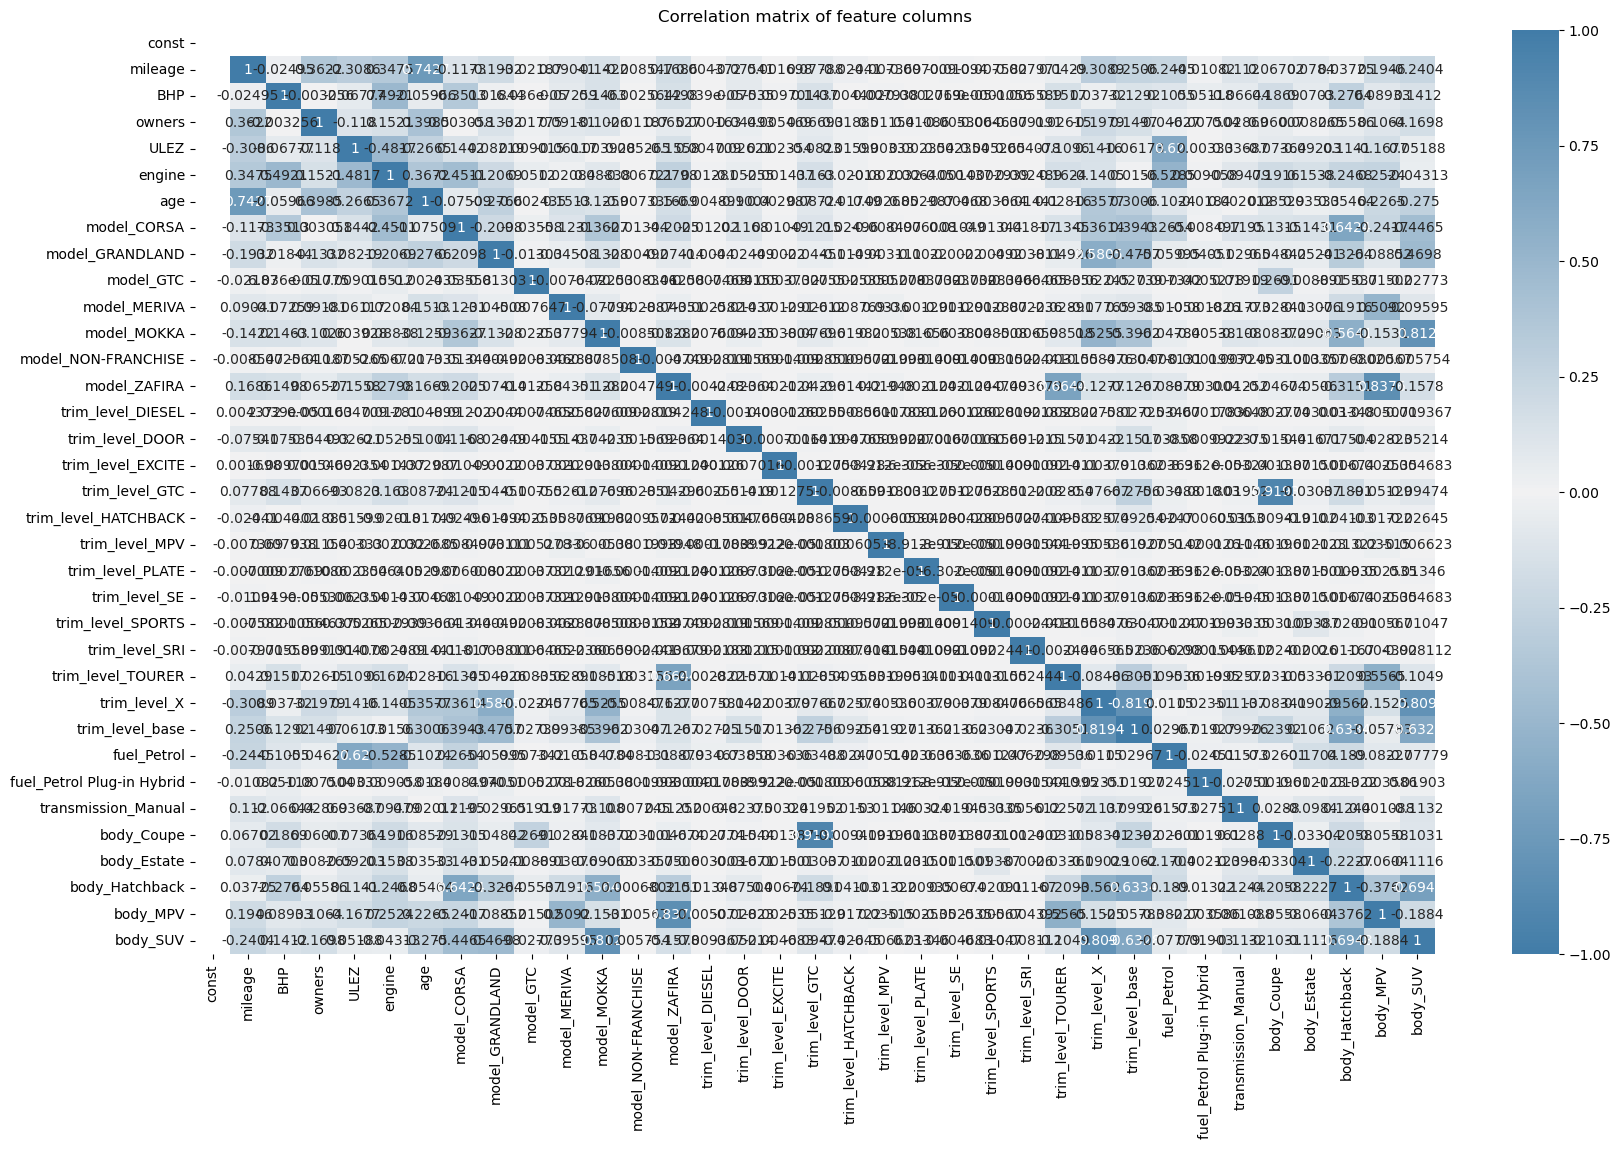

In [17]:
train_corr = X_train.corr()


plot_correlation(train_corr)

Non-Collinear columns

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

cols = list(X_train.columns)

## Experiment with what happens when you put 'y_pred'
## Remembering that y_pred is literally determined by the other fields



## We can create an indexed list (a series) where we list the VIF of each of the columns. Note the use of '.shape' in the second part of the loop
vifs = pd.Series([variance_inflation_factor(X_train[cols].values, i) for i in range(X_train[cols].shape[1])], index = X_train[cols].columns)
high_vifs = vifs[vifs > 5].index.tolist()
high_vifs

d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
d:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:195:

['model_GRANDLAND',
 'model_MERIVA',
 'model_MOKKA',
 'model_NON-FRANCHISE',
 'model_ZAFIRA',
 'trim_level_DIESEL',
 'trim_level_DOOR',
 'trim_level_EXCITE',
 'trim_level_GTC',
 'trim_level_HATCHBACK',
 'trim_level_MPV',
 'trim_level_PLATE',
 'trim_level_SE',
 'trim_level_SPORTS',
 'trim_level_SRI',
 'trim_level_TOURER',
 'trim_level_X',
 'trim_level_base',
 'body_Coupe',
 'body_Estate',
 'body_Hatchback',
 'body_MPV',
 'body_SUV']

In [19]:


## It runs the model with all of the variables. 
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X_df, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X_df.iloc[:, variables].values, ix)
               for ix in range(X_df.iloc[:, variables].shape[1])]
        
        del vif[0]
        maxloc = vif.index(max(vif)) + 1 # getting the index of the highest VIF value
        if max(vif) > thresh:
            print('dropping \'' + X_df.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop

    print('Remaining variables:')
    return list(X_df.iloc[:, variables].columns) # and return our X cut down to the remaining variables

In [20]:
noncollinear_cols = calculate_vif(X_train[cols])
noncollinear_cols

Remaining variables:


['const',
 'mileage',
 'BHP',
 'owners',
 'ULEZ',
 'engine',
 'age',
 'model_CORSA',
 'model_GRANDLAND',
 'model_GTC',
 'model_MERIVA']

In [21]:
non_significant_features = {'trim_level_PLATE',
                            'trim_level_MPV',
                            'trim_level_DOOR',
                            'trim_level_EXCITE',
                            'trim_level_SPORTS',
                            'trim_level_SRI',
                            'trim_level_SE',
                            'trim_level_DIESEL'
                             }

filtered_cols = list(set(noncollinear_cols)- non_significant_features)

In [22]:
model,rmse = create_model(Xtrain=X_train,ytrain=y_train,features=filtered_cols)
ssr = model.ssr
print('rmse:',rmse,'ssr:',ssr)

rmse: 1381.8637481444175 ssr: 30304517530.57516


In [23]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 1.576e+04
Date:                Wed, 22 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:13:54   Log-Likelihood:            -1.3728e+05
No. Observations:               15870   AIC:                         2.746e+05
Df Residuals:                   15859   BIC:                         2.747e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
engine           -142.6133     17.545     -8.129      0.000    -177.003    -108.223
model_MERIVA    -1630.9767     71.433    -22.832      0.000   -1770.993   -1490.960
owners            -95.2534     12.073     -7.890      0.000    -118.917     -71.590
model_CORSA     -1903.1251     28.052    -67.843      0.000   -1958.110   -1848.140
mileage         -1502.8983     16.820    -89.353      0.000   -1535.867   -1469.929
model_GTC        2365.0907    234.881     10.069      0.000    1904.697    2825.484
ULEZ                6.1951     47.913      0.129      0.897     -87.721     100.111
age             -2589.8942     17.650   -146.735      0.000   -2624.491   -2555.298
model_GRANDLAND  3070.1711     47.696     64.370      0.000    2976.682    3163.660
BHP               380.9917     13.658     27.895      0.000     354.220     407.763
const            9750.2351     48.244    202.101      0.000    9655.671    9844.799
==============================================================================
Omnibus:                     1000.075   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3314.617
Skew:                           0.276   Prob(JB):                         0.00
Kurtosis:                       5.170   Cond. No.                         32.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## XgBoost Regression

In [25]:
import xgboost as xgb
import helper
import pickle

# Instantiate XGBoost regressor
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3, learning_rate=0.1)

# filtered_cols.remove('const')

cols = list(X_train.columns)
cols.remove('const')
X_train = X_train[cols]

# Train the model
xgb_reg.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb_reg.predict(X_train)

# Save the trained model
with open('models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)
    

rmse, mae, r2,adj_r2 = helper.eval_metrics(y_test, y_pred,num_features=10)
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)
print('Adj R2:', adj_r2)

ValueError: list.remove(x): x not in list

In [ ]:
importances=[(x,y) for x,y in zip(X_train.columns,xgb_reg.feature_importances_)]
# sort the feature importances by importance score
importances_sorted = sorted(importances, key=lambda x: x[1], reverse=True)

# print the sorted feature importances
for feature, importance in importances_sorted:
    print(f"{feature}: {importance}")

age: 0.3890353739261627
model_GRANDLAND: 0.11574401706457138
mileage: 0.09075284749269485
body_Hatchback: 0.08681119233369827
trim_level_base: 0.06690707057714462
model_CORSA: 0.05992188677191734
engine: 0.03929588943719864
transmission_Manual: 0.03060978651046753
body_SUV: 0.027718335390090942
BHP: 0.01965869963169098
model_MOKKA: 0.01865277625620365
fuel_Petrol: 0.010583015158772469
trim_level_TOURER: 0.009702800773084164
model_MERIVA: 0.007601137273013592
body_MPV: 0.006311851087957621
body_Coupe: 0.005381176248192787
model_ZAFIRA: 0.0037891974207013845
owners: 0.0037650566082447767
model_GTC: 0.0027293090242892504
ULEZ: 0.0021730123553425074
trim_level_X: 0.001134452293626964
trim_level_GTC: 0.0009263274841941893
trim_level_DOOR: 0.0007947259582579136
model_NON-FRANCHISE: 0.0
trim_level_DIESEL: 0.0
trim_level_EXCITE: 0.0
trim_level_HATCHBACK: 0.0
trim_level_MPV: 0.0
trim_level_PLATE: 0.0
trim_level_SE: 0.0
trim_level_SPORTS: 0.0
trim_level_SRI: 0.0
fuel_Petrol Plug-in Hybrid: 0.0
b

The R-squared value of 0.95 indicates that about 90% of the variance in the dependent variable 'price' is explained by the independent variables in the model. The F-statistic and its corresponding p-value suggest that the overall model is significant.

In [ ]:
filtered_cols = [x for x,y in importances_sorted]
filtered_cols = filtered_cols[:10]
filtered_cols


# Train the model
xgb_reg.fit(X_train[filtered_cols], y_train)

# Make predictions on test data
y_pred = xgb_reg.predict(X_train[filtered_cols])

# Save the trained model
with open('models/xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_reg, f)
    

# Calculate RMSE
rmse, mae, r2,adj_r2 = helper.eval_metrics(y_test, y_pred,len(filtered_cols))
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)
print('Adj R2:', adj_r2)


TypeError: eval_metrics() takes 2 positional arguments but 3 were given

## Testing

In [ ]:
# Perform OHE on X_test, using the columns from X_train_ohe
X_test = X_test.reindex(columns=filtered_cols, fill_value=0)
print(X_test.shape)
X_test.head()

(3968, 10)


,age,model_GRANDLAND,mileage,body_Hatchback,trim_level_base,model_CORSA,engine,transmission_Manual,body_SUV,BHP
15239,0.621998,0,0.188458,0,1,0,0.821034,1,1,-0.034853
451,1.549650,0,0.746068,1,1,0,1.813983,1,0,1.244937
5605,-0.229298,0,0.308261,0,1,0,-0.171914,1,0,0.002581
1052,1.226002,0,2.229735,1,1,0,2.806932,0,0,0.002581
8972,0.094350,0,-0.321533,1,1,1,-0.171914,0,0,0.002581


Compute test Metrics


10

In [ ]:
# Calculate evaluation metrics

y_pred=xgb_reg.predict(X_test)

rmse, mae, r2,adj_r2 = helper.eval_metrics(y_test, y_pred,num_features=len(filtered_cols))
print('RMSE:', rmse)
print('MAE:', mae)
print('R2:', r2)
print('Adj R2:', adj_r2)

TypeError: eval_metrics() got an unexpected keyword argument 'num_features'

# Testing using single input

### Test Data

In [ ]:
import datetime

def predict_price(car_input, model,filtered_cols):
    # Create a DataFrame from the input dictionary
    df = pd.DataFrame([car_input])

    # df['model'] = df['model'].str.split(' ').str[1]

    df['model'] = df['model'].str.upper()

    current_year = datetime.datetime.now().year

    df['year'] = df['year'].astype('int')
    df['age'] = np.where(pd.notnull(df['year']), current_year - df['year'], df['year'].max())
    df.drop(['year'], axis=1, inplace=True)
    
    # Extract the car's condition
    condition = df['Condition'][0]

    # Drop columns that are not needed
    cols_to_drop = ['make', 'writeoff', 'Condition']
    df.drop(columns=cols_to_drop, inplace=True, axis=1)
    df['ULEZ'] = df['ULEZ'].apply(lambda x: 1 if x == 'ULEZ' else 0)

    # One-hot encode categorical columns
    cols_to_ohe = ['model', 'fuel', 'transmission', 'body']
    df_ohe = pd.get_dummies(df, columns=cols_to_ohe)

    # Reindex the DataFrame to match the filtered_cols used to train the model
    test_ohe = df_ohe.reindex(columns=filtered_cols, fill_value=0)

    print(test_ohe)

    # Make a prediction using the model
    price = model.predict(test_ohe)[0]

    # Apply a discount based on the car's condition
    if condition.lower() == 'no damage':
        price *= 0.8
    elif condition.lower() == 'moderate damage':
        price *= 0.5
    elif condition.lower() == 'heavy damage':
        price *= 0.3

    # Format the price as a string and return it
    return f"Predicted price for {car_input['model']} is £{round(price, 2)}"

In [ ]:
car_input = {'make': 'Vauxhall',
             'model':'Grandland',
             'year':'2015',
             'writeoff':'',
             'mileage':4000,
             'BHP':100,
             'transmission':'Manual',
             'fuel':'Petrol',
             'owners':2,
             'body':'Hatchback',
             'ULEZ':'Yes',
             'engine':1.4,
             'Condition':'heavy damage',
            }

model = 'models/xgb_model.pkl'
# Load the saved model
with open('models/xgb_model.pkl', 'rb') as f:
    xgb_reg = pickle.load(f)

price = predict_price(car_input, xgb_reg,filtered_cols)
price

   age  model_GRANDLAND  mileage  body_Hatchback  trim_level_base  \
0    8                1     4000               1                0   

   model_CORSA  engine  transmission_Manual  body_SUV  BHP  
0            0     1.4                    1         0  100  


'Predicted price for Grandland is £2068.55'

In [ ]:
importances=[print(x,y) for x,y in zip(filtered_cols,xgb_reg.feature_importances_)]
importances

age 0.41659817
model_GRANDLAND 0.10606597
mileage 0.115591034
body_Hatchback 0.090101205
trim_level_base 0.059596427
model_CORSA 0.081380695
engine 0.05023197
transmission_Manual 0.035838254
body_SUV 0.025078917
BHP 0.019517368


[None, None, None, None, None, None, None, None, None, None]

In [ ]:
filtered_cols

['age',
 'model_GRANDLAND',
 'mileage',
 'body_Hatchback',
 'trim_level_base',
 'model_CORSA',
 'engine',
 'transmission_Manual',
 'body_SUV',
 'BHP']